In [385]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# import mpld3
# mpld3.enable_notebook()

idx = pd.IndexSlice

## Load and clean the data

In [386]:
df = pd.read_csv('singapore-property-data.csv')
df.replace('-', 0, inplace=True)
df.replace(',', '', regex=True, inplace=True)
df[df.columns[-9:]] = df[df.columns[-9:]].convert_objects(convert_numeric=True)
print df.columns
df[df.columns[-9:]].describe()

Index([u'year', u'month', u'Project Name', u'Street Name', u'Developer',
       u'Property Type', u'Locality', u'Total Number of Units in Project',
       u'Cumulative Units Launched to-date', u'Cumulative Units Sold to-date',
       u'Cumulative Units Launched but Unsold', u'Units Launched in the Month',
       u'Units Sold in the Month',
       u'Median Price($psm) # in the Month Number Sold By Price Range',
       u'Lowest Price ($psm) # in the Month',
       u'Highest Price ($psm) # in the Month'],
      dtype='object')


/home/arcolife/.local/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


,Total Number of Units in Project,Cumulative Units Launched to-date,Cumulative Units Sold to-date,Cumulative Units Launched but Unsold,Units Launched in the Month,Units Sold in the Month,Median Price($psm) # in the Month Number Sold By Price Range,Lowest Price ($psm) # in the Month,Highest Price ($psm) # in the Month
count,31683.000000,31683.000000,31683.000000,31683.000000,31683.000000,31683.000000,31683.000000,31683.000000,31683.000000
mean,126.460847,101.389452,91.606414,9.783038,2.986523,2.941483,3263.687214,3072.236531,3444.341855
std,178.322591,158.057582,147.440738,29.291458,27.068105,19.622832,7048.835472,6715.731162,7421.786787
min,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,12.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,40.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,140.000000,108.000000,99.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1715.000000,1500.000000,1240.000000,670.000000,992.000000,770.000000,73637.000000,73637.000000,73637.000000


In [387]:
# multi-index order
mi = ['year','month', 'Property Type', 'Locality', 'Developer','Project Name', 'Street Name']
df_agg = df.set_index(mi)

# What influences the variances in units for projects / what drives the units  ?


# Aggregate units launched vs sold in the month

### Yearly distribution

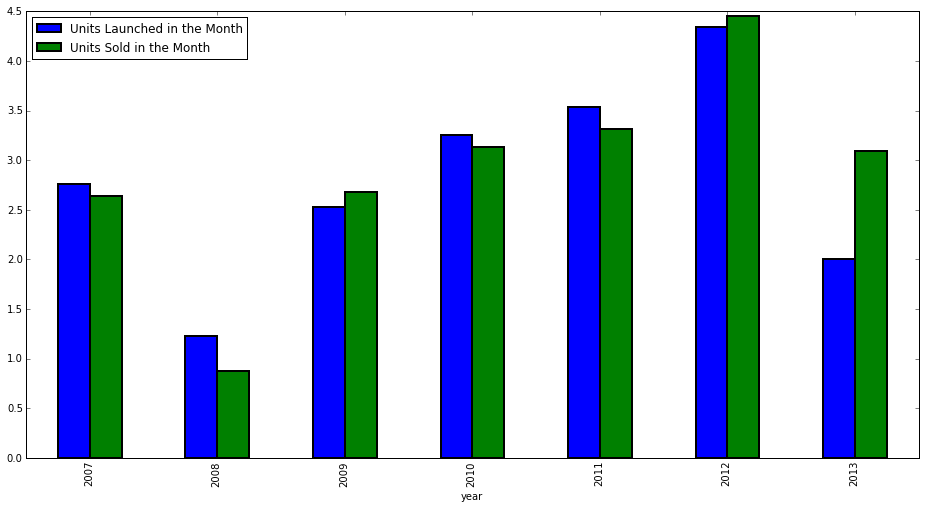

In [388]:
df_agg.sortlevel(0).groupby(level=0).mean()[df_agg.columns[4:6]].plot(figsize=(16,8), 
                            kind='bar', linewidth=2)

### Monthly distribution

#### Over the years, the month of July seems to be very active, with honorable mentioned to March and April.
#### Winters (months 10,11,12 and 1) seems to less popular in the real estate market

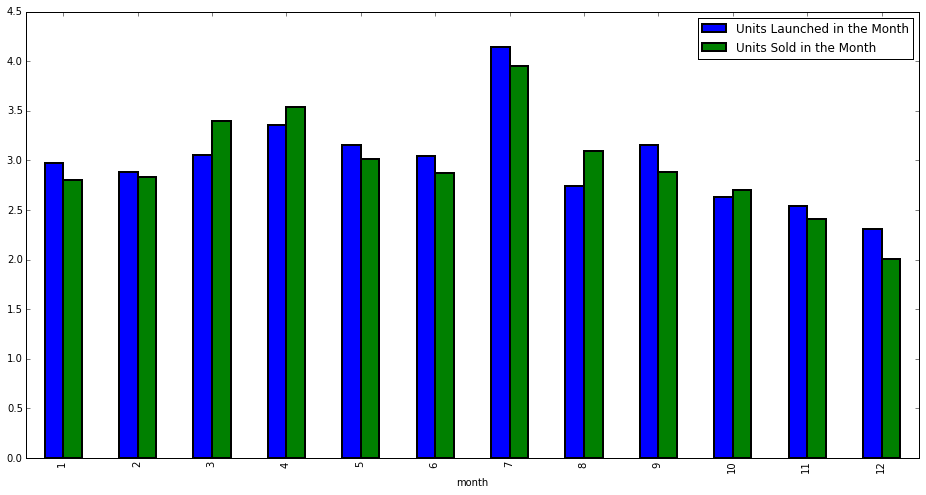

In [389]:
df_agg.sortlevel(0).swaplevel(0,1).groupby(level=0).mean()[df_agg.columns[4:6]].plot(figsize=(16,8), 
                            kind='bar', linewidth=2)

# Year wise price distribution

## from 2007 to 2008, there was a severe drop in prices

We see that from 2007 to 2008, there was a severe drop in prices, and this continued for a bit upto 2009.. If we related this to 2008's global financial crisis, it makes sense that the prices would've dropped.

While in 2012-13, the world came back to a state of financial stability.. Hence the surge in prices as well as number of units, due to a strong Fiscal Year ending.

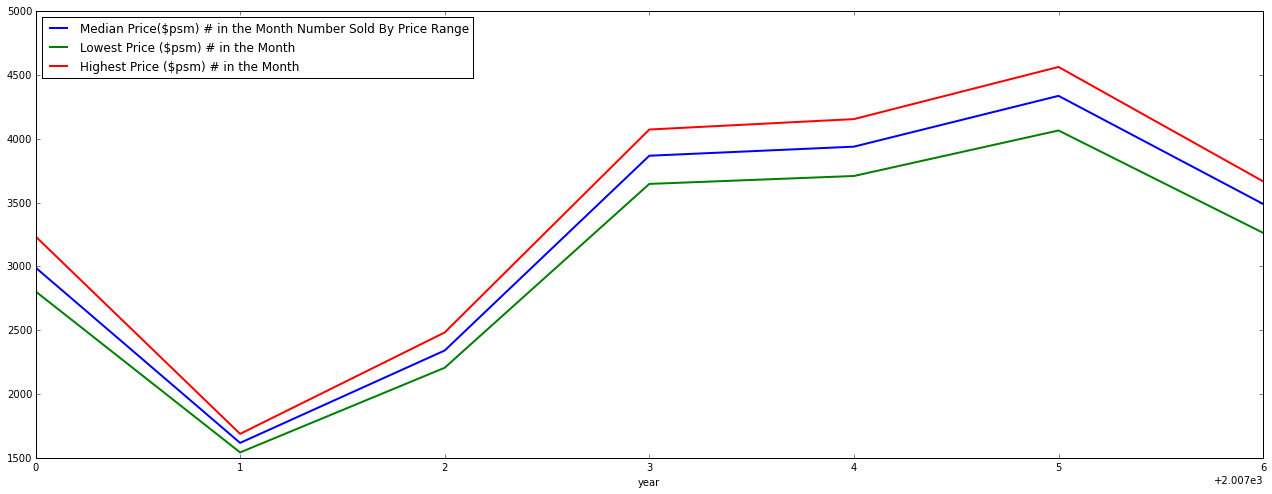

In [390]:
df_agg.sortlevel(0).groupby(level=0).mean()[df_agg.columns[-3:]].plot(figsize=(22,8), 
                             linewidth=2)

## This could also be seen in the number of units sold in the around 2008.

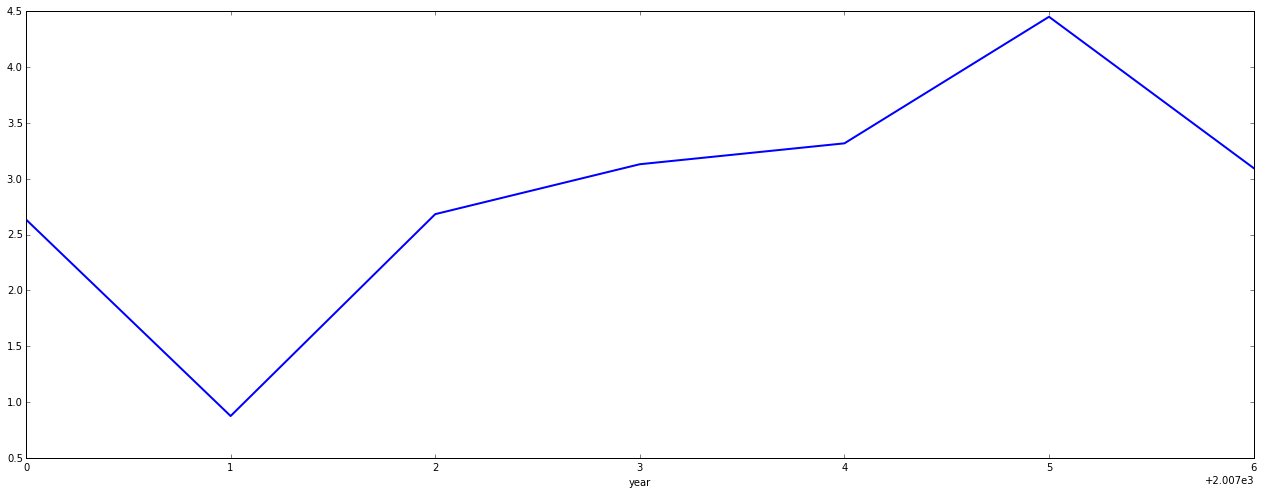

In [391]:
df_agg.sortlevel(0).groupby(level=0).mean()['Units Sold in the Month'].plot(figsize=(22,8),
                             linewidth=2)

# Yearly distribution of property price index

## Property Type { Locality } with monthly granularity

### General Behavior over the years

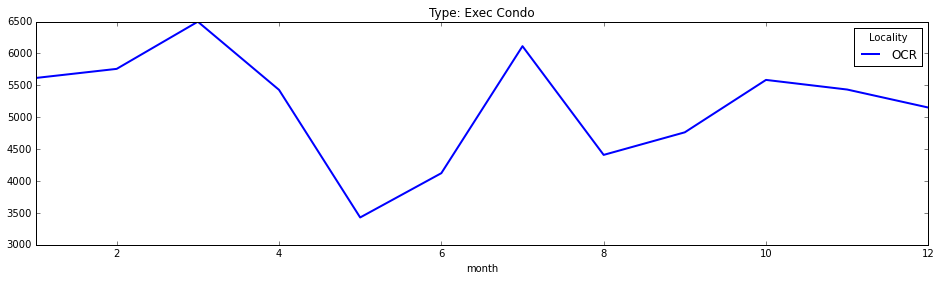

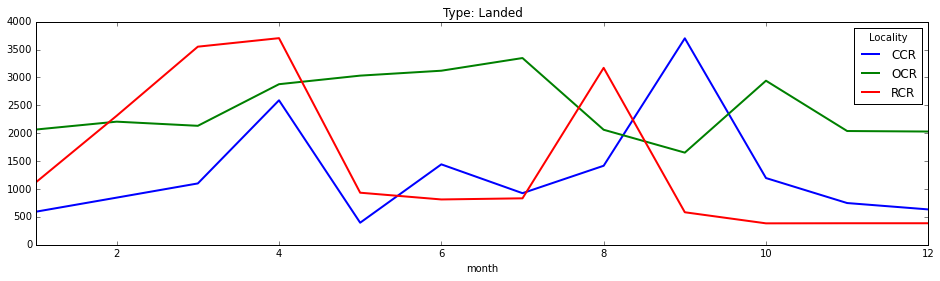

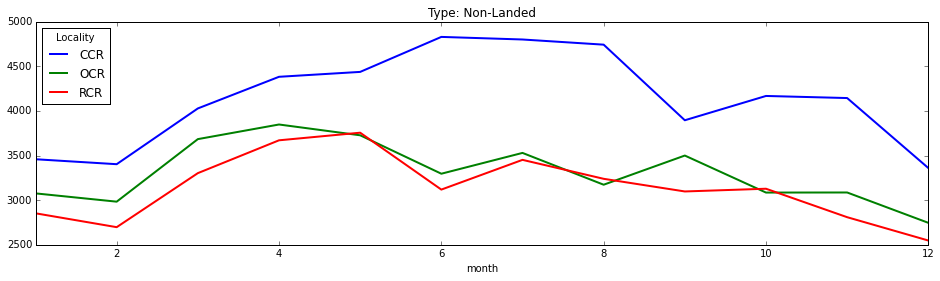

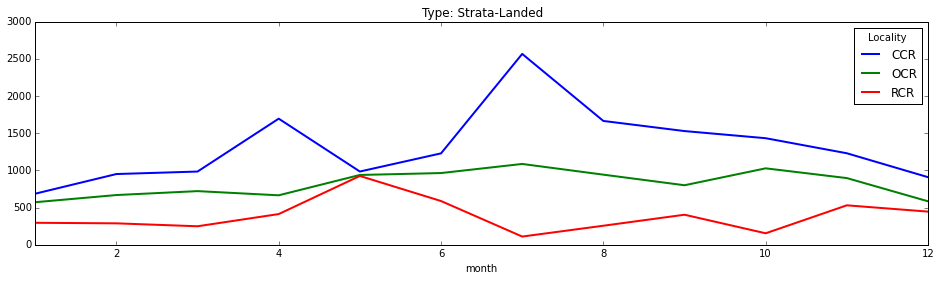

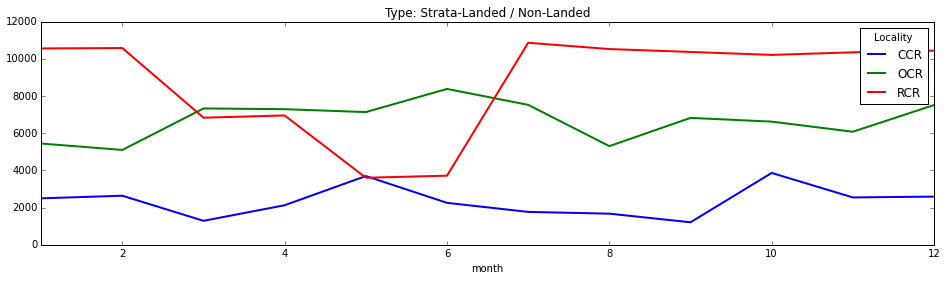

In [392]:
# multi-index order
mi = ['year', 'Property Type', 'Locality', 'month'] 
drp = [u'Project Name', u'Street Name', u'Developer', 
      u'Total Number of Units in Project',
       u'Cumulative Units Launched to-date', 
       u'Cumulative Units Sold to-date',
       u'Cumulative Units Launched but Unsold', 
       u'Units Launched in the Month',
       u'Units Sold in the Month',
       u'Lowest Price ($psm) # in the Month',
#        u'Median Price($psm) # in the Month Number Sold By Price Range',
       u'Highest Price ($psm) # in the Month']

df_agg = df.set_index(mi).drop(drp, axis=1)
# calculate monthly mean for all years 
df_agg = df_agg.sortlevel(0).groupby(level=[0,1,2,3]).mean()

prop_types = df_agg.index.get_level_values('Property Type').unique()

for _type in prop_types:
    df_spec = df_agg.xs(_type, level='Property Type', drop_level=True)
    df_spec = df_spec.swaplevel(0,2).swaplevel(0,1)
    df_spec = df_spec.groupby(level=[0,1]).mean().unstack(0)
    df_spec.columns = df_spec.columns.droplevel()
    df_spec.plot(figsize=(16,4), linewidth=2, title="Type: %s" % (_type))

### Per year, detailed distribution of Property Type price index

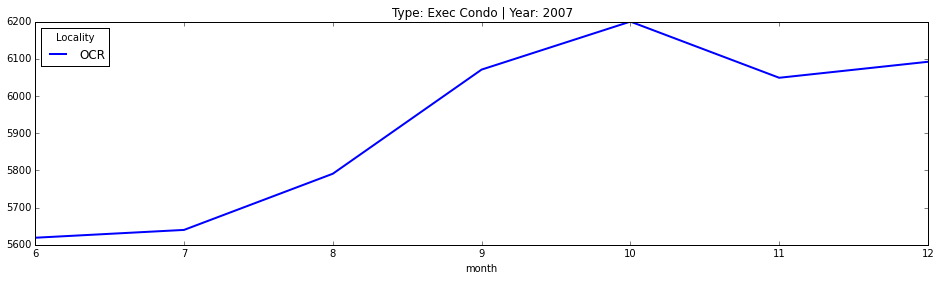

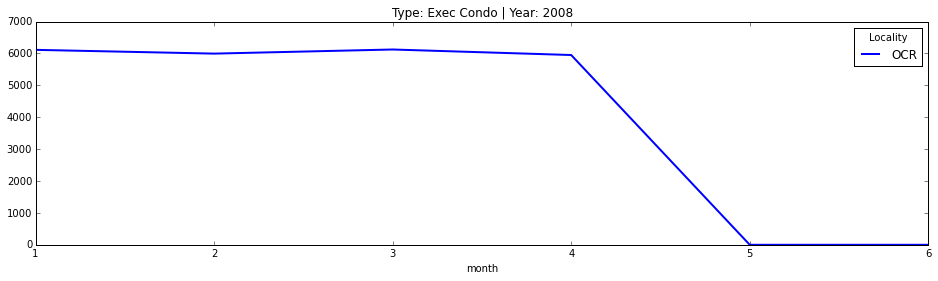

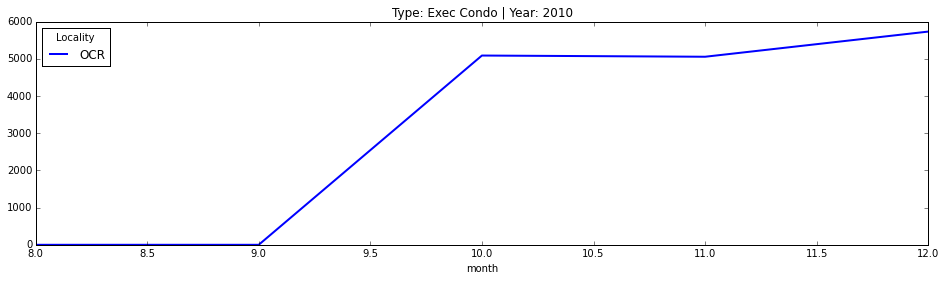

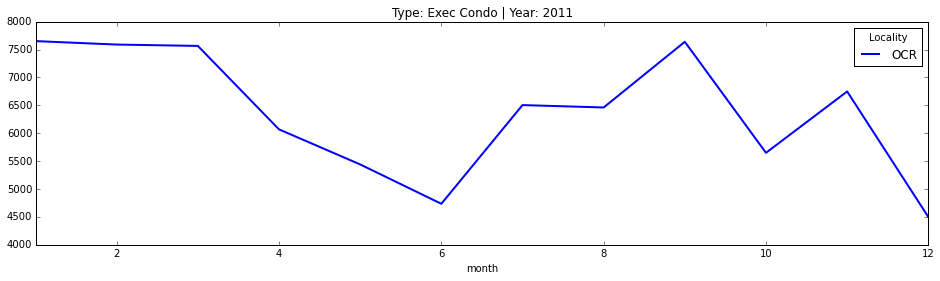

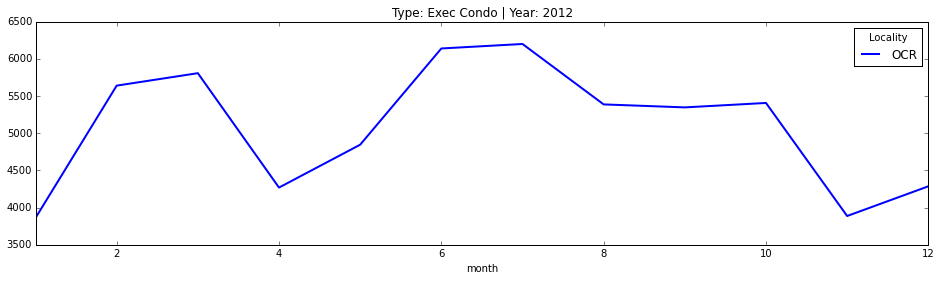

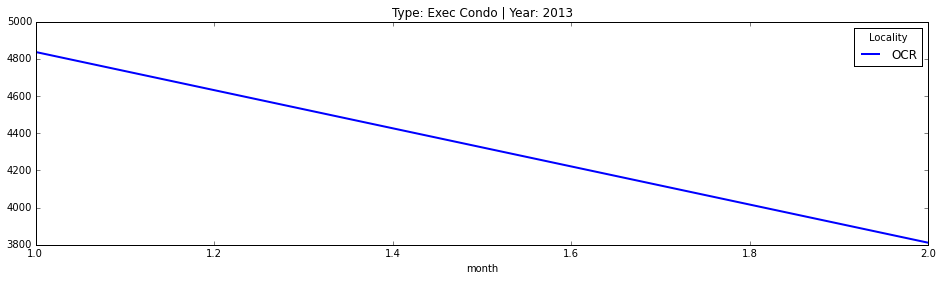

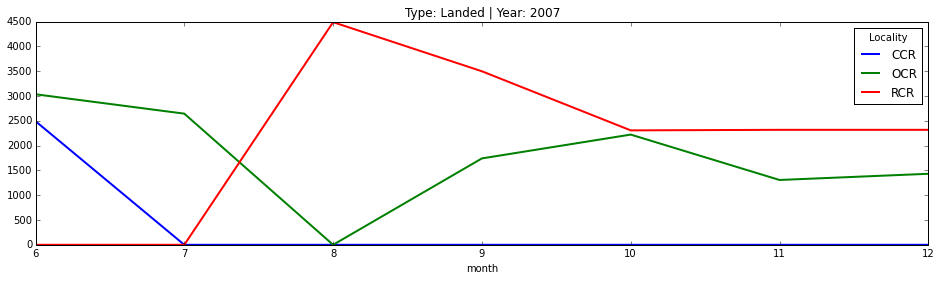

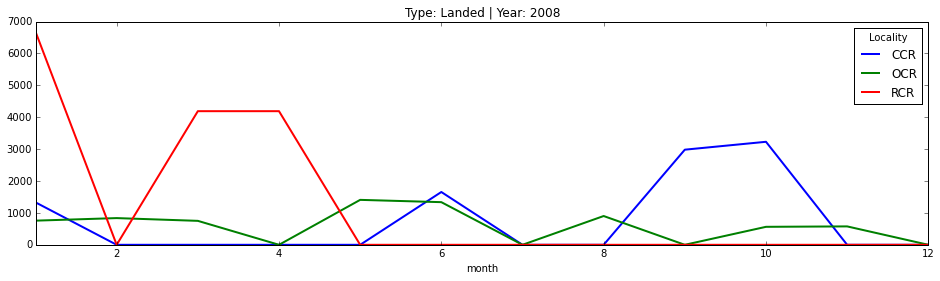

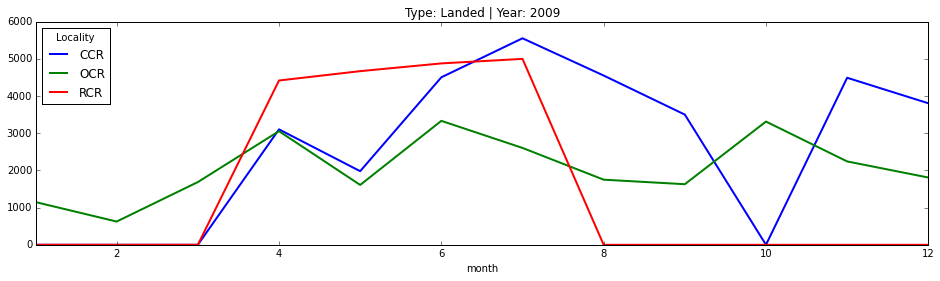

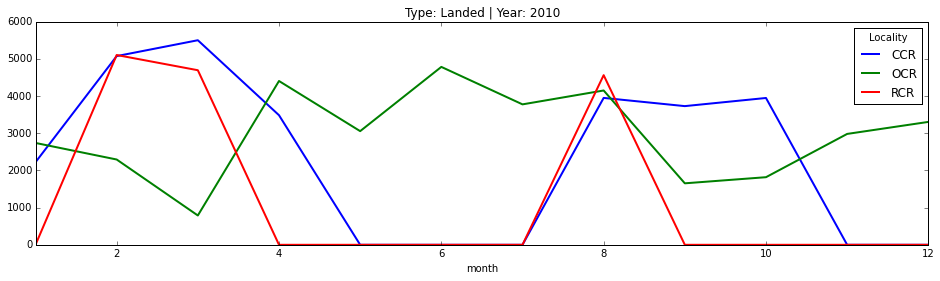

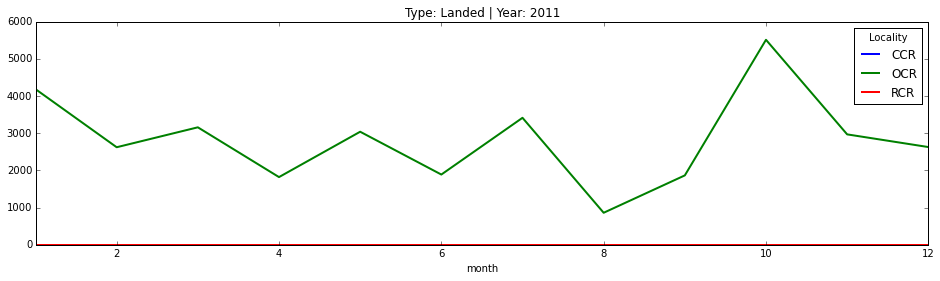

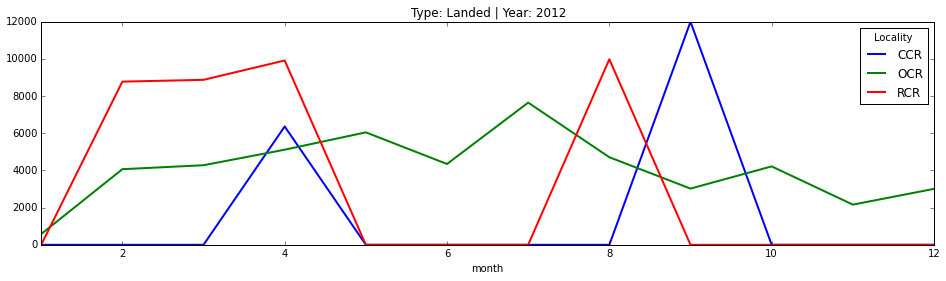

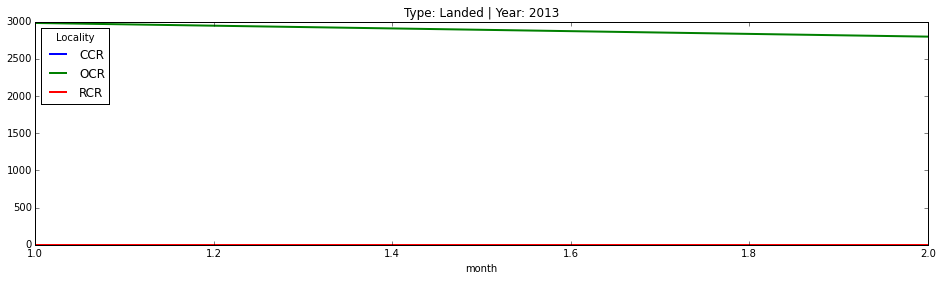

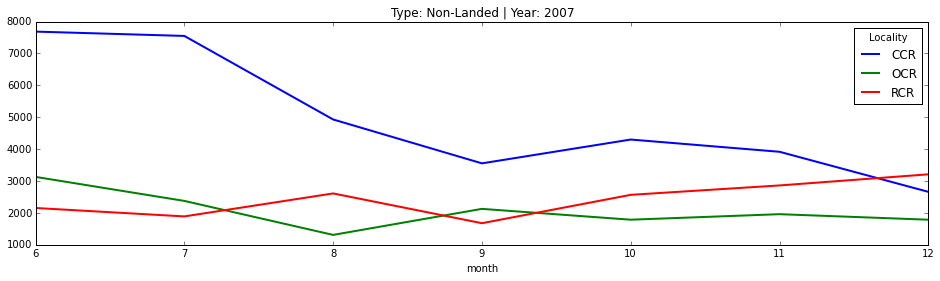

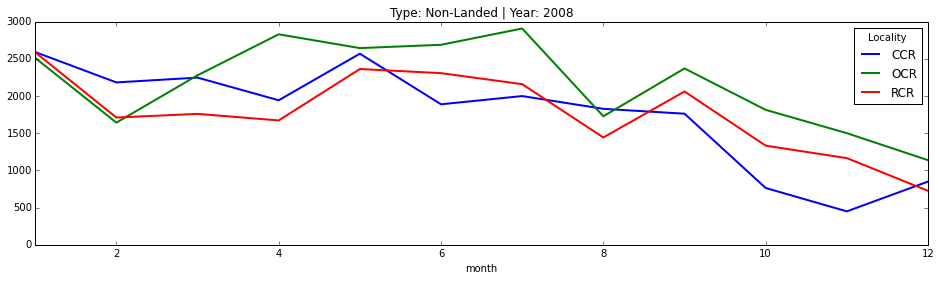

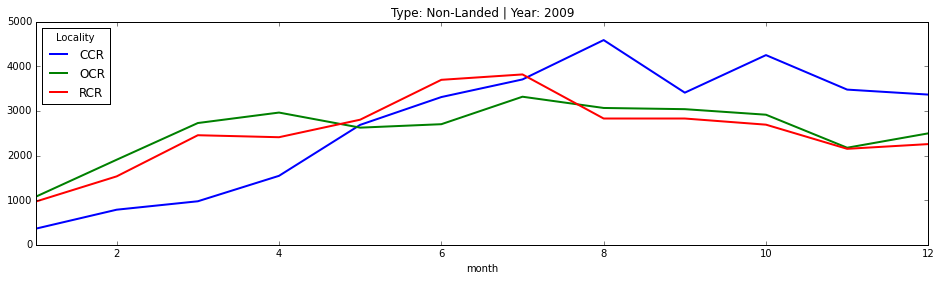

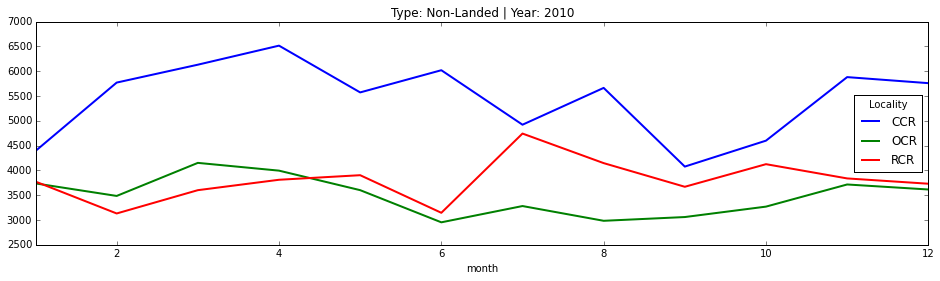

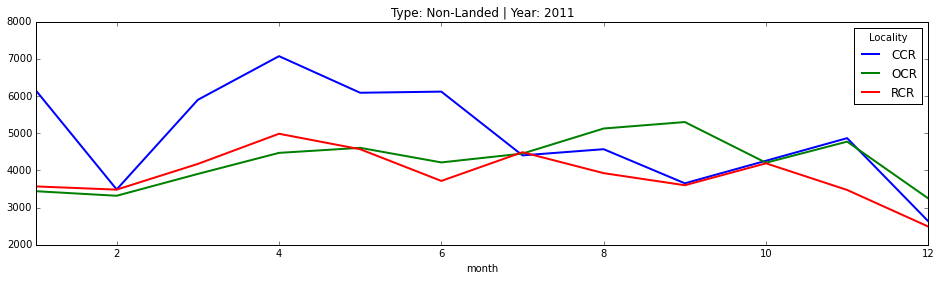

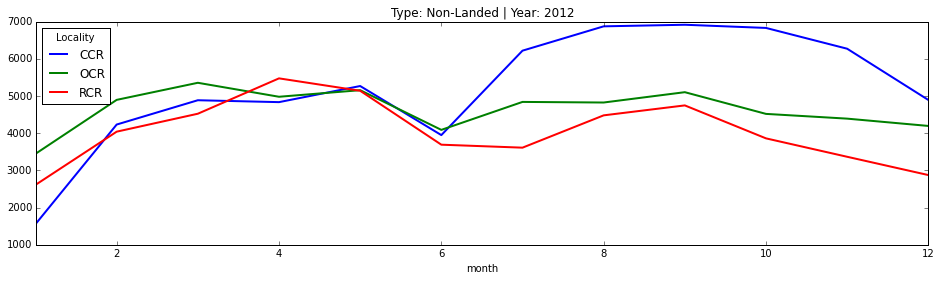

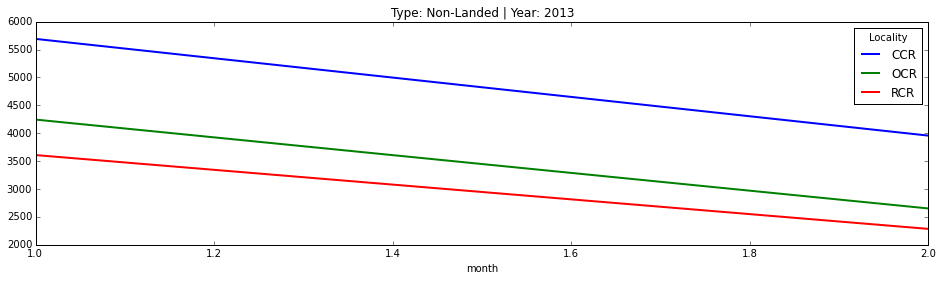

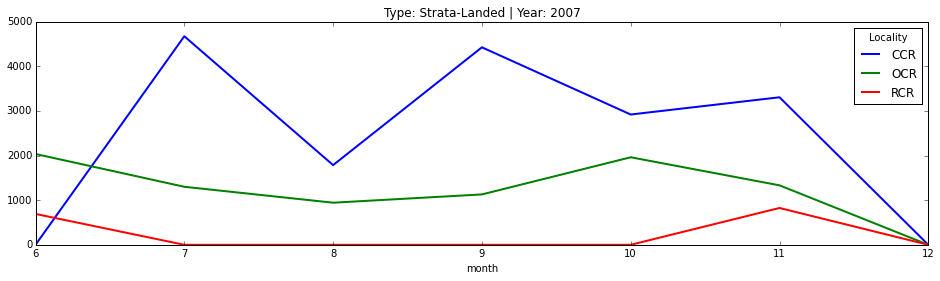

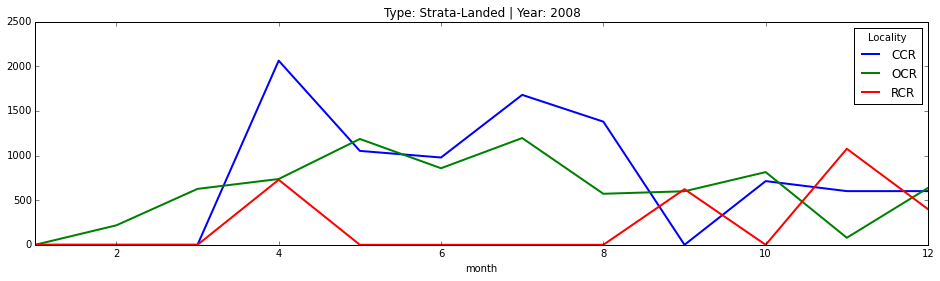

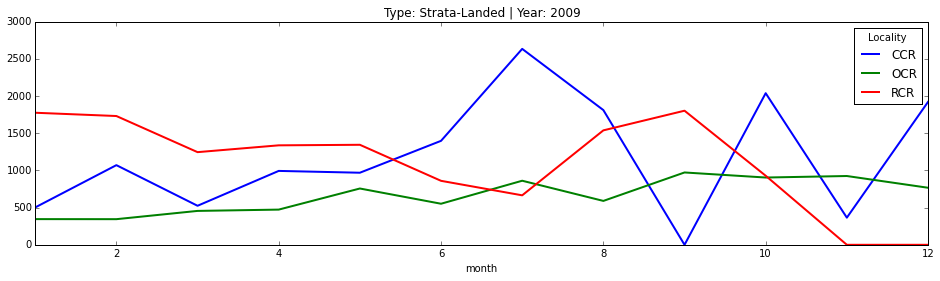

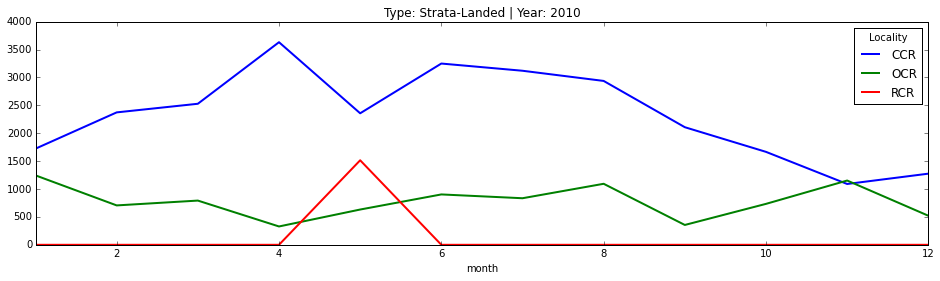

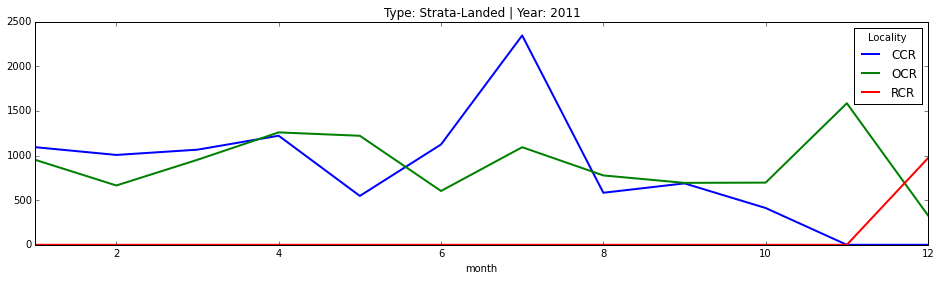

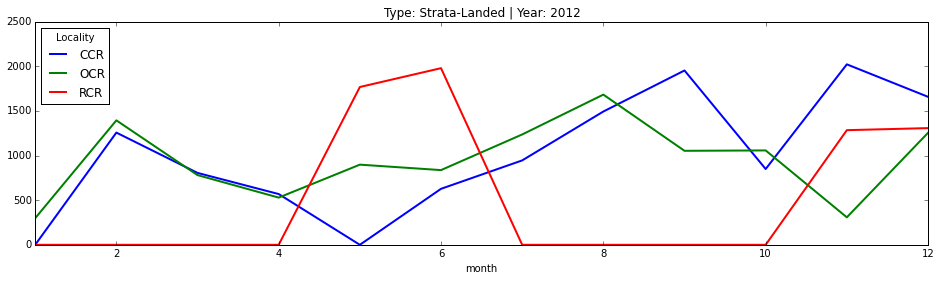

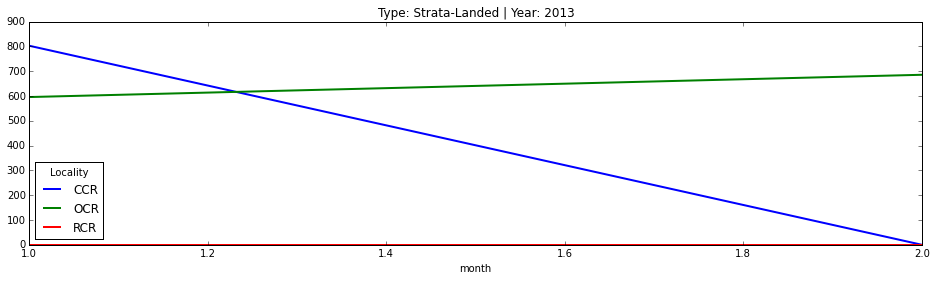

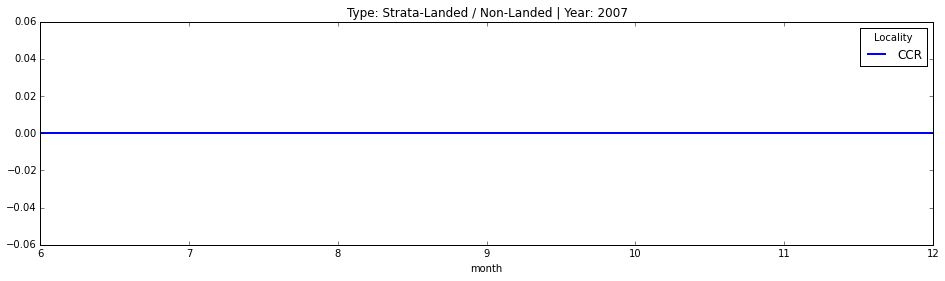

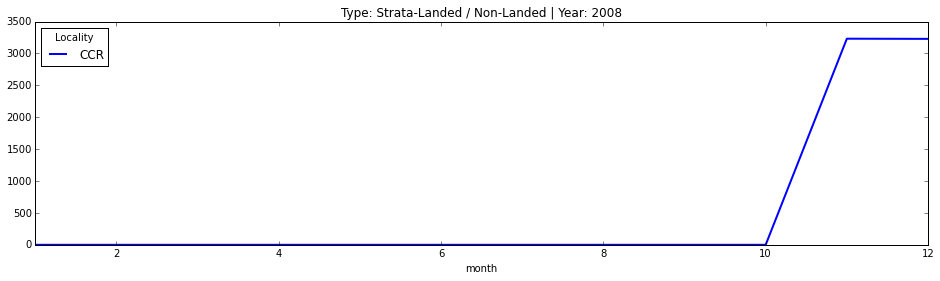

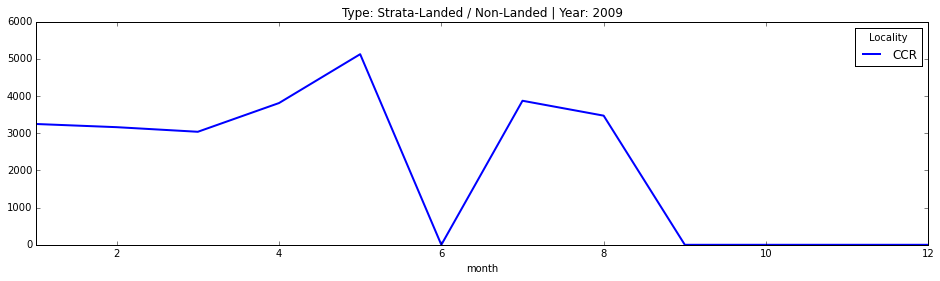

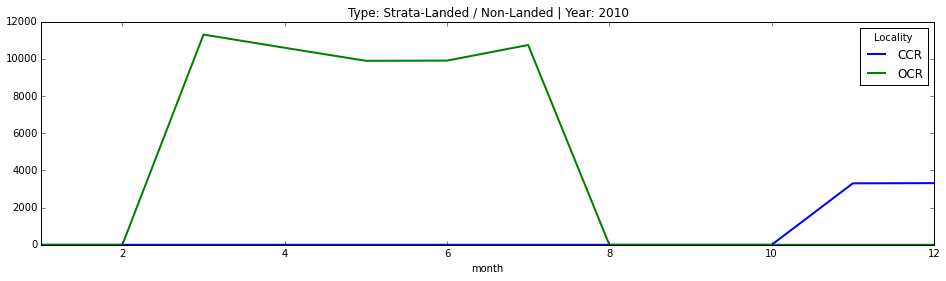

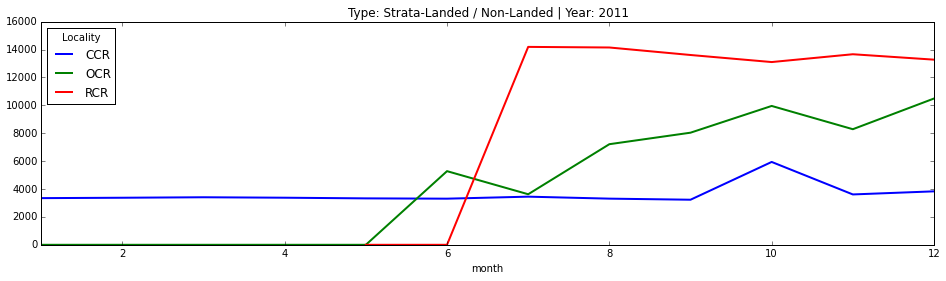

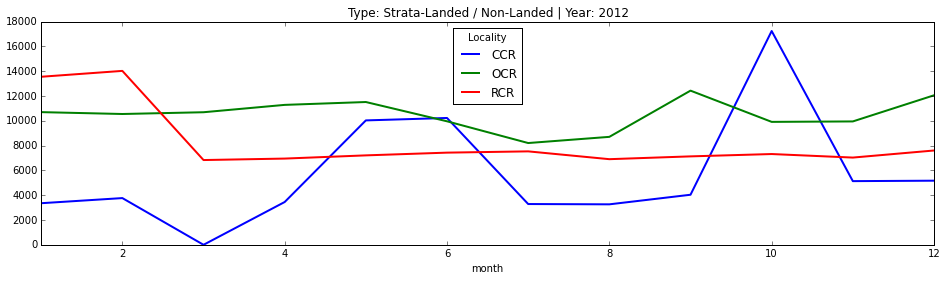

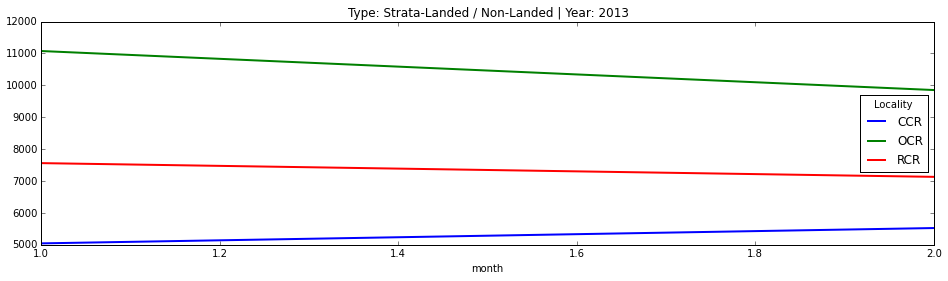

In [393]:
for _type in prop_types:
    df_spec = df_agg.xs(_type, level='Property Type', drop_level=True)
    years = df_spec.index.get_level_values(0).unique()
    for year in years:
        df_ = df_spec.xs(year, level='year', drop_level=True)
        df_ = df_.unstack(0)
        df_.columns = df_.columns.droplevel()
        df_.plot(figsize=(16,4), linewidth=2, title="Type: %s | Year: %s" % (_type, year))

## More graphs

### Mean of 'Units Sold in the Month' over the years (2007-2013)

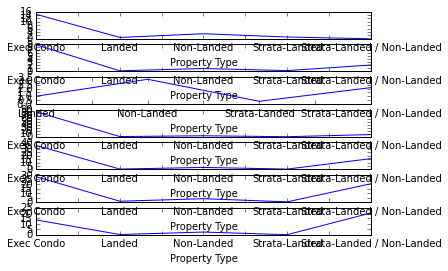

In [394]:
# df.set_index(mi).xs(2007, level='year', drop_level=True)
df_agg = df.set_index(mi).sortlevel([0,1]).groupby(level=[0,1]).mean()
years = df_agg.index.get_level_values(0).unique()
f, a = plt.subplots(len(years),1)

for i in xrange(len(years)):
    df_agg['Units Sold in the Month'].xs(years[i]).plot(ax=a[i])
# df_agg['Units Sold in the Month']

# Other Statistics (FAQs, per se)

### Developer stats

1. Developers with highest cumulative units launched to-date
2. Developers with consistently high solds

### Street stats
1. High-range selling streets
2. Budget streets
3. Low-range streets

### Project highlights
1. Projects with highest number of units launched and sold
2. Projects with most number of streets associated (determine project size)

### Locality

### Property Type

### Others (more depth of analysis needed)

- Year vs monthly variations, how does it affect the economic cycle?
- Variation in prices, how does landed OCR/RCR/CCR vary with non-landed/strata/exec condos.. 
- other correlations along similar lines, with side-by-side comparisions


In [395]:
# df_agg = df.set_index(mi).xs(2007, level='year', drop_level=True)
# top_streets = df_agg.groupby(level=4).sum()\
#     .sort_values('Median Price($psm) # in the Month Number Sold By Price Range', 
#                  ascending=False).index[:10]
# df_agg = df_agg.iloc[df_agg.index.get_level_values('Street Name').isin(top_streets)]
# df_agg = df_agg.sortlevel(0)\
#     ['Median Price($psm) # in the Month Number Sold By Price Range']\
#     .dropna() #.swaplevel(0,-2).swaplevel(1,-1)\
# df_agg = df_agg.reset_index(level=[0,1,2,3], drop=True)

#### Per year stats for streets with Highest solds

In [396]:
for y in df0.year.unique():
    tmp = df0[df0.year == y]
    streets = tmp.sort_values(['Highest Price ($psm) # in the Month'], ascending=False)
    print y, streets[['Street Name', 'Highest Price ($psm) # in the Month']].iloc[0].tolist() 
    
    print tmp['Median Price($psm) # in the Month Number Sold By Price Range'].std()
# tmp.groupby('Highest Price ($psm) # in the Month').first()

2007 ['ORCHARD BOULEVARD', 60278.0]
10735.9522303
2008 ['SCOTTS ROAD', 49644.0]
6933.46197909
2009 ['SCOTTS ROAD', 46328.0]
5716.52708358
2010 ['CUSCADEN WALK', 51667.0]
7067.89621471
2011 ['PATERSON HILL', 73637.0]
7528.2928639
2012 ['PATERSON HILL', 66898.0]
6997.23094239
2013 ['ARDMORE PARK', 47060.0]
7295.16864927


In [397]:
# multi-index order
mi = ['year','month', 'Property Type', 'Locality', 'Developer','Project Name', 'Street Name']

# df.set_index(mi).sortlevel([0,1,2,3,4,5,6]).sort_values('Median Price($psm) # in the Month Number Sold By Price Range', ascending=False)
df_agg = df.set_index(mi).replace(0, pd.np.nan)
# df_agg#.unstack(0).shift(0).stack()#.swaplevel(0,-1).swaplevel(1,4)
# df_agg.xs(2007, level='year', drop_level=True).swaplevel(2,3).swaplevel(3,4).swaplevel(2,3).sortlevel(2)

In [398]:
df_agg.sort_values('Highest Price ($psm) # in the Month', ascending=False).groupby(level=[0,1,2,3,4,5]).mean()

Total Number of Units in Project  \
year month Property Type              Locality Developer                                        Project Name                                                       
2007 6     Exec Condo                 OCR      Tanglin View Pte Ltd                             LA CASA                                                      444   
           Landed                     CCR      Chiselhurst Green Pte Ltd                        THE VILLAS @ SENTOSA COVE                                      8   
                                               Far East Land And Housing Development Co Pte Ltd LANDED HOUSING DEVELOPMENT                                     6   
                                               Glaxton Trading Pte Ltd                          LANDED HOUSING DEVELOPMENT                                     7   
                                               Golden Development Pte Ltd                       THE GREENWOOD (PHASE 4)                                       80   
                                               Ho Bee (Sentosa) Pte Ltd                         LANDED HOUSING DEVELOPMENT                                    21   
                                               Ho Bee Homes Pte Ltd                             PARADISE ISLAND                                               29   
                                               Lion (S) Pte Ltd                                 LANDED HOUSING DEVELOPMENT                                     8   
                                               Tiong Aik Development Pte Ltd                    LANDED HOUSING DEVELOPMENT                                     6   
                                      OCR      Bukit Batok Development Pte Ltd                  PAVILION PARK (PHASES 1C & 1D)                                80   
                                               Bullion Holdings Pte Ltd                         FLORIDA PARK (PHASE 3)                                        73   
                                               Deneside Pte Ltd                                 THE SILVA GARDENS                                              5   
                                               Fragrance Land Pte Ltd                           LANDED HOUSING DEVELOPMENT                                    12   
                                               Kallang Development Pte Ltd                      THE SPRINGSIDE                                               147   
                                               Lucky Realty Co Pte Ltd                          CASHEW HILL                                                   31   
                                               Odeon Leasing Pte Ltd                            LANDED HOUSING DEVELOPMENT                                     6   
                                               Papageno Investment Pte Ltd                      LANDED HOUSING DEVELOPMENT                                     6   
                                               Singapore United Estates Pte Ltd                 MIMOSA TERRACE (PH 4PH 6)                                     83   
                                               Tai Lai Holdings Pte Ltd                         BANYAN VILLAS                                                 64   
                                               Wan Fu Investments Pte Ltd                       BUKIT VILLAS                                                 121   
                                      RCR      Soon Lian Realty Pte Ltd                         LANDED HOUSING DEVELOPMENT                                    23   
                                               Teck Chiang Realty Pte Ltd                       LANDED HOUSING DEVELOPMENT                                     7   
           Non-Landed                 CCR      Acecharm Pte Ltd                                 WATERFALL GARDENS                                            132   
                            